# Network Data Science with NetworkX and Python

## Create and visualize sub-graphs

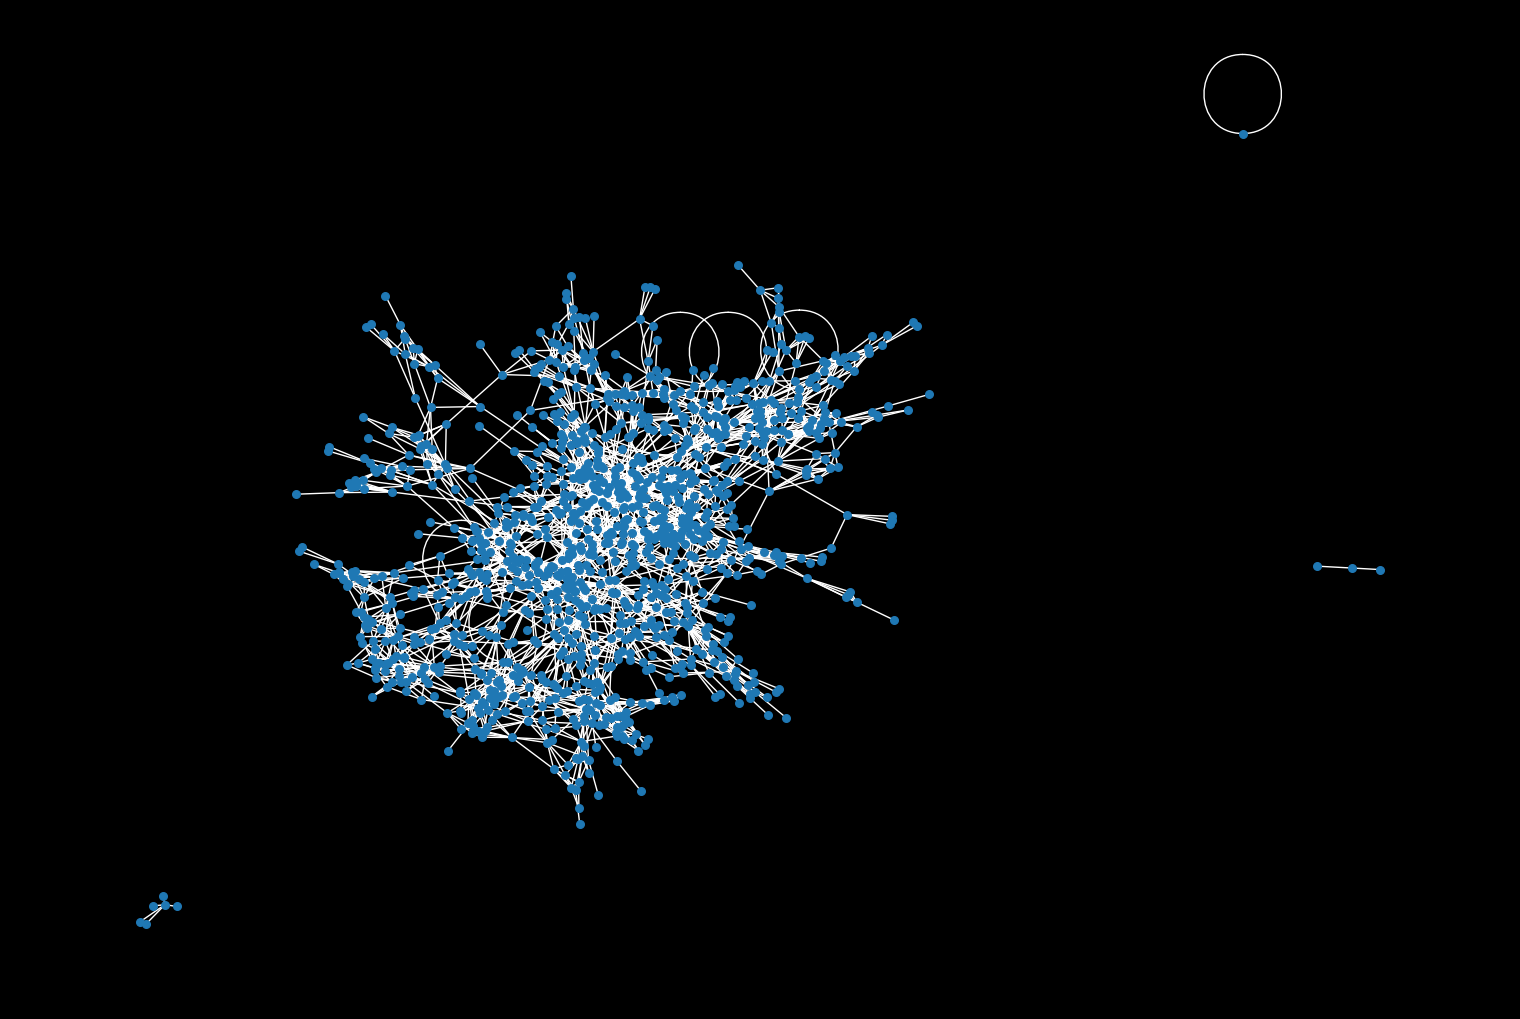

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from random import sample

link = ("https://github.com/dnllvrvz/Social-Network-Dataset/"
        "raw/master/Social%20Network%20Dataset.xlsx")

network_data = pd.read_excel(link, sheet_name=['Elements', 'Connections'])
elements_data = network_data['Elements'] # node list
connections_data = network_data['Connections'] # edge list
edge_cols = ['Type', 'Weight', 'When']
graph = nx.convert_matrix.from_pandas_edgelist(connections_data,
                                               source='From',
                                               target='To',
                                               edge_attr=edge_cols)

node_dict = elements_data.set_index('Label').to_dict(orient='index')
nx.set_node_attributes(graph, node_dict)

fig = plt.figure(figsize=(15, 10))
nx.draw(graph, 
        node_size=30,
        edge_color='white')
fig.set_facecolor('black')

In [2]:
len(graph.nodes)

1193

In [3]:
len(graph.edges)

2947

In [4]:
node = sample(graph.nodes, 1)[0]
graph.nodes[node]

/var/folders/mf/r664td9s2dl_lprk6yy30fx80000gn/T/ipykernel_23840/3429354074.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  node = sample(graph.nodes, 1)[0]


{'Type': 'Student', 'School (ID)': 34, 'Answered the form': 'No'}

/var/folders/mf/r664td9s2dl_lprk6yy30fx80000gn/T/ipykernel_23840/114913148.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = sample(graph.nodes, 800)


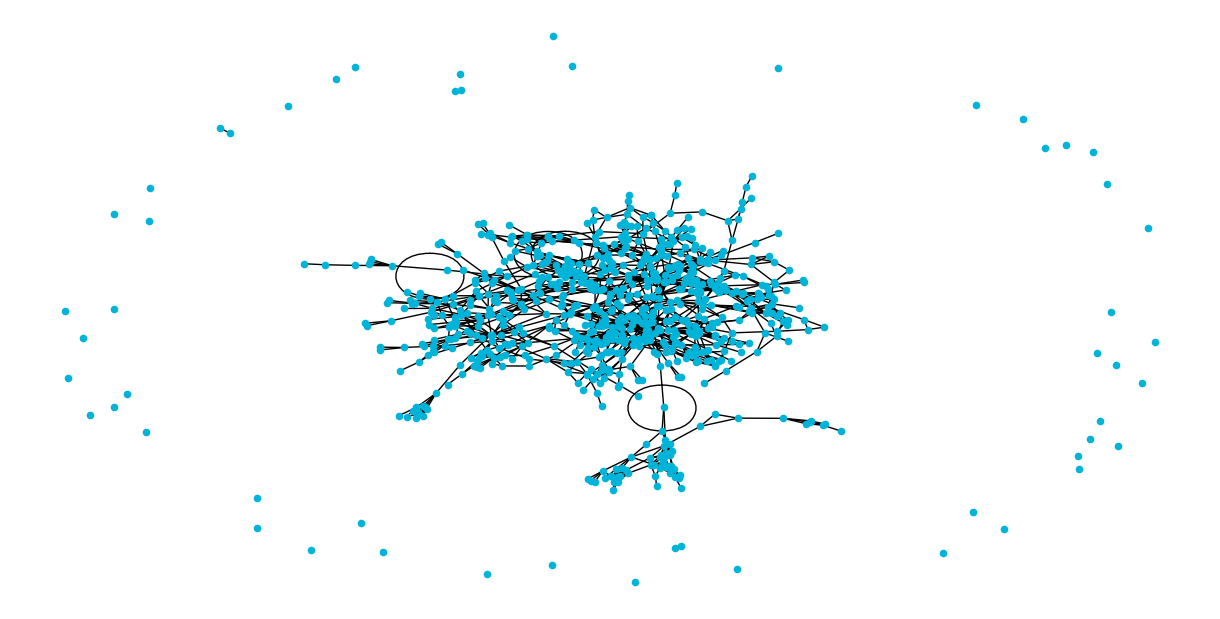

In [7]:
sampled_nodes = sample(graph.nodes, 800)
subgraph = graph.subgraph(sampled_nodes)
centrality = nx.closeness_centrality(graph)
colors = list(centrality.values())
plt.figure(figsize=(12, 6))
nx.draw(subgraph,
        node_size=20,
        node_color='#00b4d9',
        with_labels=False)

In [8]:
from collections import defaultdict

nodes_school_id = nx.get_node_attributes(graph,
                                         'School (ID)')
school_nodes = defaultdict(list)
for node, school_id in nodes_school_id.items():
    school_nodes[school_id].append(node)

In [9]:
school_nodes[5]

['S-82d78a', 'S-087f53']

In [10]:
graph.nodes['S-087f53']

{'Type': 'Student', 'School (ID)': 5, 'Answered the form': 'No'}

In [11]:
subgraphs = {}
for school_id, nodes in school_nodes.items():
    subgraph = graph.subgraph(nodes)
    subgraphs[school_id] = subgraph

In [12]:
subgraphs[5].nodes

NodeView(('S-82d78a', 'S-087f53'))

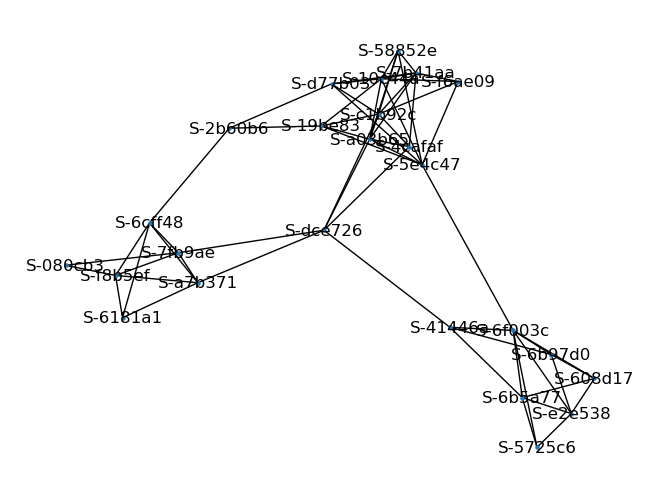

In [13]:
nx.draw(subgraphs[3],
        node_size=5,
        with_labels=True)

In [14]:
node

'S-1a36bb'